Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Test/")

In [4]:
import os

# List files in the train dataset directory
files_in_train_dataset = os.listdir(data_dir_train)
print("Files in train dataset:", files_in_train_dataset)

Files in train dataset: ['actinic keratosis', 'seborrheic keratosis', 'vascular lesion', 'nevus', 'squamous cell carcinoma', 'melanoma', 'pigmented benign keratosis', 'dermatofibroma', 'basal cell carcinoma']


In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2246
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds= image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    batch_size = 32,
    image_size=(img_height,img_width),
    seed=123
)

## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
##train_ds = ##todo

Found 3812 files belonging to 9 classes.
Using 3050 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    batch_size = 32,
    image_size=(img_height,img_width),
    seed=123
)

Found 3812 files belonging to 9 classes.
Using 762 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

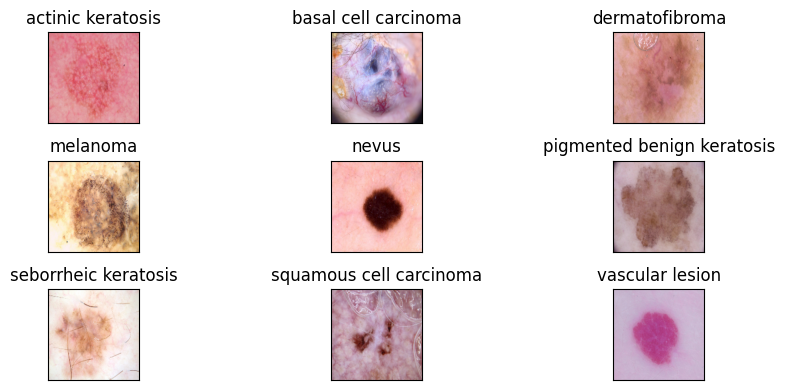

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
fig = plt.figure(figsize=(10, 4))
num_classes=9
for i in range(num_classes):
    for images, labels in train_ds:
        idx = np.where(labels.numpy() == i)[0]
        if len(idx) > 0:
            image = images[idx[0]].numpy()
            label = class_names[i]
            break
    ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
    ax.set_title(label)
    ax.imshow(image.astype("uint8"))
plt.tight_layout()
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
num_classes=9
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
input_shape = (180, 180, 3)
model = Sequential()
model.add(layers.Rescaling(1./255,input_shape=input_shape))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=input_shape))
model.add(Activation('relu'))
##model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
##model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
##model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
##model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
##model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
##model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
##model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                        

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


96/96 [==============================] - 44s 166ms/step - loss: 2.0515 - accuracy: 0.2364 - val_loss: 1.8062 - val_accuracy: 0.2992
Epoch 2/20
96/96 [==============================] - 8s 82ms/step - loss: 1.7799 - accuracy: 0.3226 - val_loss: 1.6297 - val_accuracy: 0.3517
Epoch 3/20
96/96 [==============================] - 8s 83ms/step - loss: 1.6734 - accuracy: 0.3646 - val_loss: 1.5391 - val_accuracy: 0.4029
Epoch 4/20
96/96 [==============================] - 8s 83ms/step - loss: 1.6194 - accuracy: 0.4010 - val_loss: 1.6420 - val_accuracy: 0.3911
Epoch 5/20
96/96 [==============================] - 8s 83ms/step - loss: 1.5109 - accuracy: 0.4495 - val_loss: 1.5142 - val_accuracy: 0.4291
Epoch 6/20
96/96 [==============================] - 8s 84ms/step - loss: 1.4432 - accuracy: 0.4708 - val_loss: 1.4676 - val_accuracy: 0.4619
Epoch 7/20
96/96 [==============================] - 8s 84ms/step - loss: 1.2174 - accuracy: 0.5666 - val_loss: 1.3256 - val_accuracy: 0.5184
Epoch 8/20
96/96 [====

### Visualizing training results

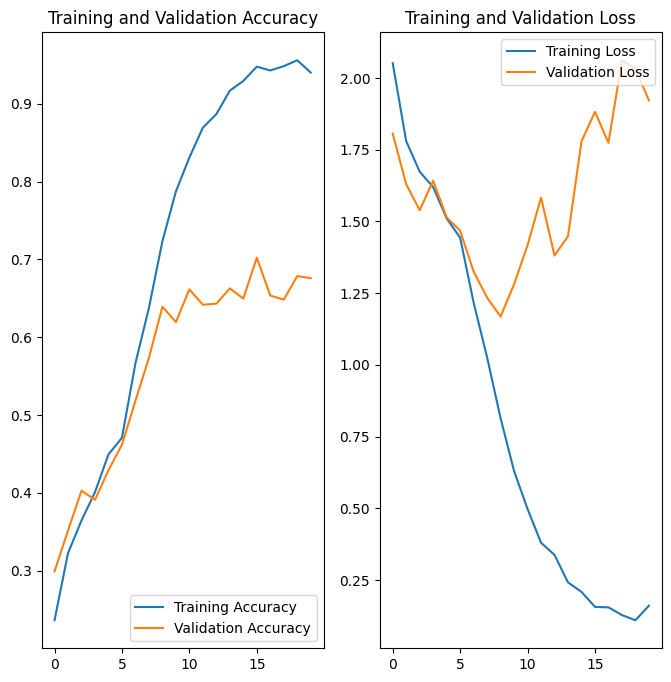

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

The model seems to have overfit since the accuracy is more on training set compared to validation set. The difference is pretty big.



In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),
  ]
)

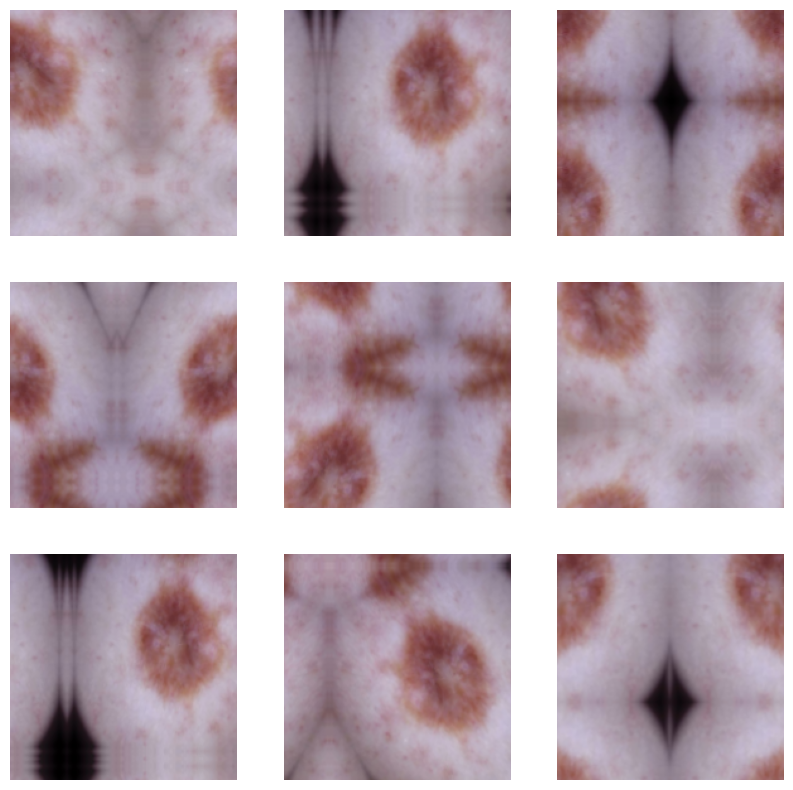

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
input_shape = (180, 180, 3)
model1 = Sequential()
model1.add(layers.Rescaling(1./255,input_shape=input_shape))
model1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=input_shape))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(128, (3, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

### Compiling the model

In [20]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
96/96 [==============================] - 14s 102ms/step - loss: 13.2192 - accuracy: 0.2731 - val_loss: 4.4425 - val_accuracy: 0.1483
Epoch 2/20
96/96 [==============================] - 10s 99ms/step - loss: 2.3075 - accuracy: 0.2731 - val_loss: 15.3747 - val_accuracy: 0.2283
Epoch 3/20
96/96 [==============================] - 10s 100ms/step - loss: 1.9458 - accuracy: 0.3374 - val_loss: 14.6636 - val_accuracy: 0.2218
Epoch 4/20
96/96 [==============================] - 10s 100ms/step - loss: 1.7992 - accuracy: 0.3666 - val_loss: 6.1861 - val_accuracy: 0.2178
Epoch 5/20
96/96 [==============================] - 10s 100ms/step - loss: 1.7318 - accuracy: 0.3741 - val_loss: 8.0912 - val_accuracy: 0.2034
Epoch 6/20
96/96 [==============================] - 10s 100ms/step - loss: 1.5794 - accuracy: 0.4321 - val_loss: 1.5706 - val_accuracy: 0.5026
Epoch 7/20
96/96 [==============================] - 10s 101ms/step - loss: 1.5026 - accuracy: 0.4472 - val_loss: 1.5866 - val_accuracy: 0.47

### Visualizing the results

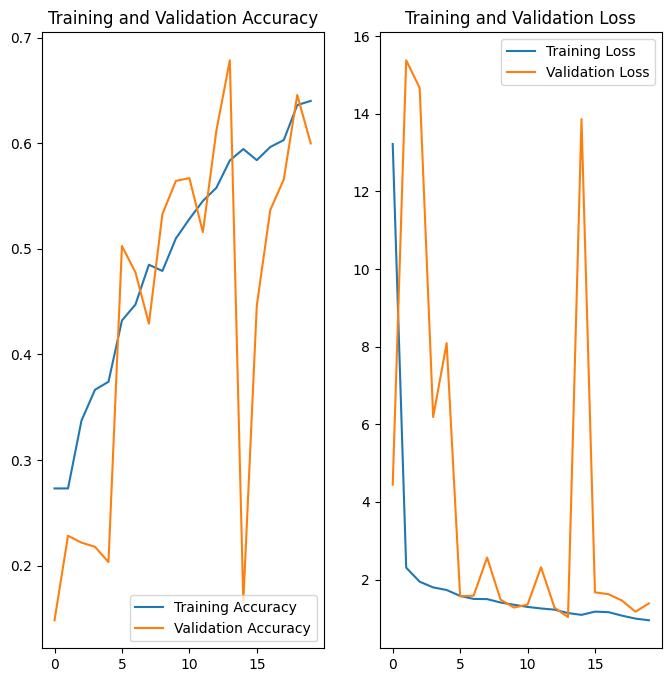

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

 The accuracy has dropped by a lot of measure but the validation accuracy has improved by a few points


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/CNN_assignment/Skin_c...,actinic keratosis
1,/content/gdrive/My Drive/CNN_assignment/Skin_c...,actinic keratosis
2,/content/gdrive/My Drive/CNN_assignment/Skin_c...,actinic keratosis
3,/content/gdrive/My Drive/CNN_assignment/Skin_c...,actinic keratosis
4,/content/gdrive/My Drive/CNN_assignment/Skin_c...,actinic keratosis
...,...,...
2241,/content/gdrive/My Drive/CNN_assignment/Skin_c...,basal cell carcinoma
2242,/content/gdrive/My Drive/CNN_assignment/Skin_c...,basal cell carcinoma
2243,/content/gdrive/My Drive/CNN_assignment/Skin_c...,basal cell carcinoma
2244,/content/gdrive/My Drive/CNN_assignment/Skin_c...,basal cell carcinoma


Class=0, n=114 (5.076%)
Class=6, n=77 (3.428%)
Class=8, n=139 (6.189%)
Class=4, n=357 (15.895%)
Class=7, n=181 (8.059%)
Class=3, n=438 (19.501%)
Class=5, n=467 (20.793%)
Class=2, n=95 (4.230%)
Class=1, n=378 (16.830%)


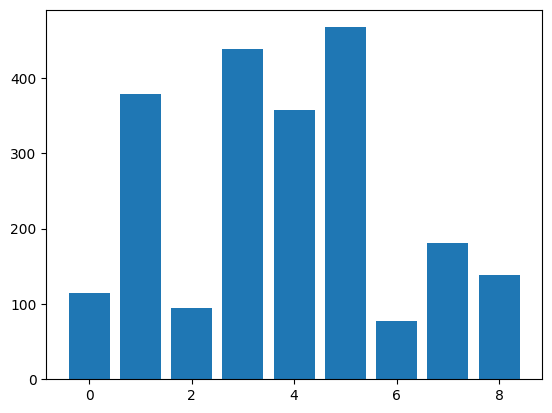

In [24]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


Class 6 has the least and Class 5 dominates.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
path_to_training_dataset="/content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4C2681CA60>: 100%|██████████| 500/500 [00:23<00:00, 21.21 Samples/s]


Initialised with 378 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4C264CF880>: 100%|██████████| 500/500 [00:25<00:00, 19.52 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4C5A123FA0>: 100%|██████████| 500/500 [00:18<00:00, 27.05 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7F4C26535FF0>: 100%|██████████| 500/500 [01:15<00:00,  6.59 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F4C2655CAF0>: 100%|██████████| 500/500 [01:13<00:00,  6.81 Samples/s]


Initialised with 467 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4C2681CA60>: 100%|██████████| 500/500 [00:18<00:00, 27.53 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F4C266B0220>: 100%|██████████| 500/500 [00:41<00:00, 12.02 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F4C2681CA60>: 100%|██████████| 500/500 [00:18<00:00, 26.98 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F4C2655C160>: 100%|██████████| 500/500 [00:19<00:00, 26.12 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6066


### Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
import os
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026729.jpg_4f3a7f13-410e-45cd-be2a-bc81ab8437f4.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029133.jpg_7670cffe-b986-4606-bb8a-a37bdb7bdfa3.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027615.jpg_f6974e1c-e8fe-4444-80bb-2abc047a6ae5.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026194.jpg_b3760265-9fb1-4658-9382-71ec252b97dd.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032135.jpg_8b81a02b-0ce8-4185-8fd7-25a219eab851.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/actinic keratosis/output/actinic keratosis_origina

In [29]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [30]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [31]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = pd.concat([original_df, df2], ignore_index=True)

In [32]:
new_df['Label'].value_counts()

Label
basal cell carcinoma          1378
actinic keratosis             1114
dermatofibroma                1095
melanoma                      1004
pigmented benign keratosis     967
nevus                          857
squamous cell carcinoma        681
vascular lesion                639
seborrheic keratosis           577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [34]:
data_dir_train="/content/gdrive/My Drive/CNN_assignment/Skin_cancer_ISIC/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training',
  ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(180, 180),
  batch_size=batch_size)

Found 8312 files belonging to 9 classes.
Using 6650 files for training.


#### **Todo:** Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(180, 180),
  batch_size=batch_size)

Found 8312 files belonging to 9 classes.
Using 1662 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [36]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [37]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [38]:

epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
208/208 [==============================] - 68s 81ms/step - loss: 1.8580 - accuracy: 0.3059 - val_loss: 1.4697 - val_accuracy: 0.4440
Epoch 2/50
208/208 [==============================] - 6s 29ms/step - loss: 1.3584 - accuracy: 0.5033 - val_loss: 1.1906 - val_accuracy: 0.5963
Epoch 3/50
208/208 [==============================] - 6s 28ms/step - loss: 1.0890 - accuracy: 0.6069 - val_loss: 1.1791 - val_accuracy: 0.5951
Epoch 4/50
208/208 [==============================] - 6s 31ms/step - loss: 0.8715 - accuracy: 0.6919 - val_loss: 0.8646 - val_accuracy: 0.7010
Epoch 5/50
208/208 [==============================] - 6s 27ms/step - loss: 0.6788 - accuracy: 0.7669 - val_loss: 0.8921 - val_accuracy: 0.7016
Epoch 6/50
208/208 [==============================] - 6s 26ms/step - loss: 0.5222 - accuracy: 0.8173 - val_loss: 0.6951 - val_accuracy: 0.7768
Epoch 7/50
208/208 [==============================] - 6s 28ms/step - loss: 0.4069 - accuracy: 0.8573 - val_loss: 0.5869 - val_accuracy: 0.806

#### **Todo:**  Visualize the model results

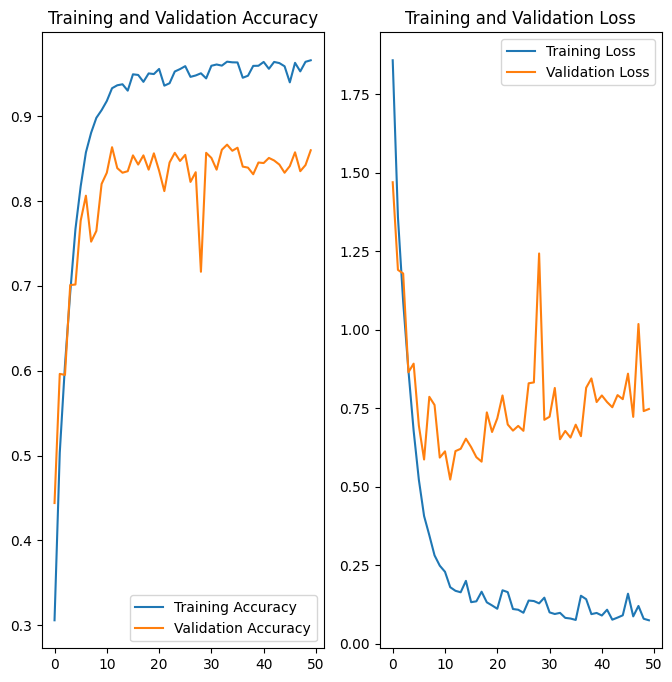

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The class rebalancing highly helped both the accuracy and the validation accuracy helped. Would consider this to be a much better fit.
